In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Fraud.csv')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.duplicated().sum()

No duplicates in the data

In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No null values

In [7]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<Axes: ylabel='count'>

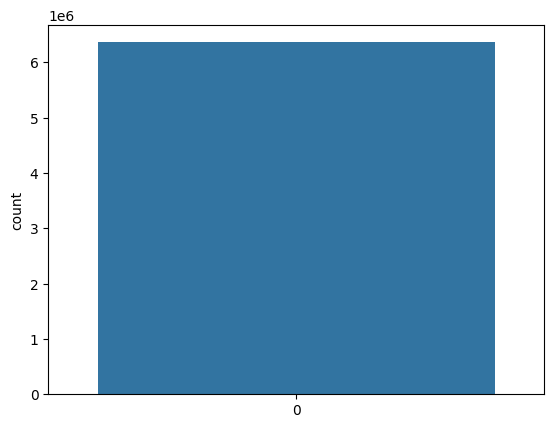

In [8]:
import seaborn as sns
import matplotlib.pylab as plt
sns.countplot(df["isFraud"])

Data is highly imbalanced so we have to balance the data 

In [9]:
df.groupby("isFraud")["type"].value_counts() 

isFraud  type    
0        CASH_OUT    2233384
         PAYMENT     2151495
         CASH_IN     1399284
         TRANSFER     528812
         DEBIT         41432
1        CASH_OUT       4116
         TRANSFER       4097
Name: type, dtype: int64

fraud transaction is only in cash_out and transfer options only

In [10]:
print(df['type'].unique())
# checking for unique values

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


<ipython-input-11-fe2252758f39>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

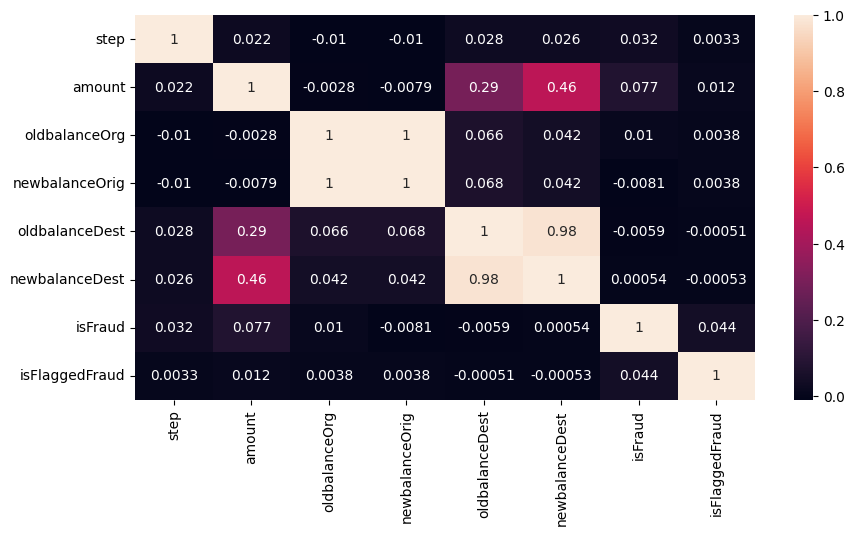

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

- high correlation between old balance and new balance
- there is multicolinearity
- droping old balance and new balance and also 
- droping irrelavent columns
- correlation between amount and newbalance dest and oldbalance dest

In [12]:
df.drop(columns=['nameOrig','nameDest','isFlaggedFraud','oldbalanceOrg','newbalanceDest'],inplace=True)

In [13]:
df.head()

,step,type,amount,newbalanceOrig,oldbalanceDest,isFraud
0,1,PAYMENT,9839.64,160296.36,0.0,0
1,1,PAYMENT,1864.28,19384.72,0.0,0
2,1,TRANSFER,181.00,0.00,0.0,1
3,1,CASH_OUT,181.00,0.00,21182.0,1
4,1,PAYMENT,11668.14,29885.86,0.0,0


Encoding the data 

In [23]:
df =pd.get_dummies(df,columns=['type'])

In [24]:
df.head()

,step,amount,newbalanceOrig,oldbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,160296.36,0.0,0,0,0,0,1,0
1,1,1864.28,19384.72,0.0,0,0,0,0,1,0
2,1,181.00,0.00,0.0,1,0,0,0,0,1
3,1,181.00,0.00,21182.0,1,0,1,0,0,0
4,1,11668.14,29885.86,0.0,0,0,0,0,1,0


In [25]:
x=df.drop(columns=["isFraud"])
y=df["isFraud"]

In [26]:
x.head() # features

,step,amount,newbalanceOrig,oldbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,160296.36,0.0,0,0,0,1,0
1,1,1864.28,19384.72,0.0,0,0,0,1,0
2,1,181.00,0.00,0.0,0,0,0,0,1
3,1,181.00,0.00,21182.0,0,1,0,0,0
4,1,11668.14,29885.86,0.0,0,0,0,1,0


In [27]:
y.head() # target

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,recall_score,precision_score


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [29]:
smt=SMOTE()
x_smote,y_smote=smt.fit_resample(x,y)

In [30]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_smote,y_smote,test_size=0.20,random_state=1)

In [32]:
logreg=LogisticRegression()
logreg.fit(x_train1,y_train1)
y_pred1=logreg.predict(x_test1)

In [33]:
print("Accuracy:",accuracy_score(y_test1, y_pred1))
print("Precision:",precision_score(y_test1, y_pred1))
print("Recall:",recall_score(y_test1, y_pred1))

Accuracy: 0.6852881248173021
Precision: 0.6266207287813065
Recall: 0.9174605422030292


In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train1,y_train1)
y_pred = clf.predict(x_test1)

In [42]:
print("Accuracy:",accuracy_score(y_test1, y_pred))
print("Precision:",precision_score(y_test1, y_pred))
print("Recall:",recall_score(y_test1, y_pred))

Accuracy: 0.9848990641535029
Precision: 0.9800027408438684
Recall: 0.9900093998639183


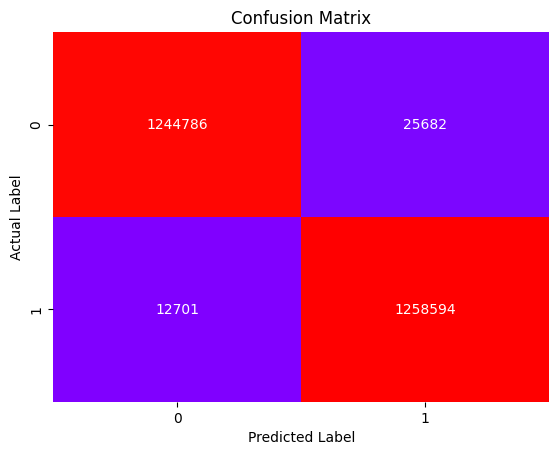

In [43]:
confusion_matrix(y_test1,y_pred)
sns.heatmap(confusion_matrix(y_test1,y_pred),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


1) Data cleaning including missing values, outliers and multi-collinearity.
A- Dataset contains no missing values, Dataset have high multicollinearity and Selected features have not much outliers.

2) How did you select variables to be included in the model?
A- Removing unneccesary columns such as ('step','nameOrig', 'nameDest') from the dataset because it doesnot affect the target and dropping columns causing  multicollinearity because it will affect the accuracy of the model,the data has no duplicate and null values so nothing to done there and applying SMOTE technique on target column for handling imabalanced dataset.

3) Demonstrate the performance of the model by using best set of tools.
A- For classification problems such as this the evaluation metric are accuracy, precision, recall, f1_score and confusion matrix, auc-roc value which are 
calculated and demonstrate the overall performance of the model.

4) What are the key factors that predict fraudulent customer? and 
5) Do these factors make sense? If yes, How? If not, How not? 
A-'type', 'amount' are most important key factors which predict the fraudulent customer.

 Decision tree classifire gives best accuracy, precision and auroc value